In [18]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import Sequence
from tensorflow.keras.layers import Dense, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Conv2DTranspose
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.utils import shuffle
import tensorflow.keras as keras
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


In [2]:
img_w,img_h = 448,448


In [3]:
inputs1 = Input(shape=(img_h, img_w, 3,))
encoder_output = Conv2D(64, (3,3), activation='relu', padding='same', strides=2)(inputs1)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
decoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(32, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(16, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(3, (3, 3), activation='tanh', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)

model = Model(inputs=inputs1, outputs=decoder_output)
model.compile(optimizer='adamax',loss='mse')
print(model.summary())
    


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 448, 448, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 128)     147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 256)     295168    
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 256)       590080

In [4]:
before = 'before_filtering/'
after = 'after_filtering/'

before2 = 'before_filtering_rm_bg/'
after2 = 'after_filtering_rm_bg/'

befores = os.listdir(before)
afters = os.listdir(after)

before2s = os.listdir(before2)
after2s = os.listdir(after2)

print(len(befores),len(afters))

X = [];Y = []
for i in range(len(befores)):
    x = cv2.imread(before+befores[i])
    x = cv2.resize(x,(img_w,img_w))
    x=x/255
    X.append(x)

    y = cv2.imread(after+befores[i])
    y = cv2.resize(y,(img_w,img_w))
    y=y/255
    Y.append(y)
    
for i in range(len(before2s)):
    x = cv2.imread(before2+before2s[i])
    x = cv2.resize(x,(img_w,img_w))
    x=x/255
    X.append(x)

    y = cv2.imread(after2+before2s[i])
    y = cv2.resize(y,(img_w,img_w))
    y=y/255
    Y.append(y)


301 301


In [5]:
X = np.array(X)
Y = np.array(Y)
X, Y = shuffle(X, Y, random_state=0)
X.shape, Y.shape

((602, 448, 448, 3), (602, 448, 448, 3))

In [11]:
datagen = ImageDataGenerator()

hist = model.fit_generator(datagen.flow(X, Y, batch_size=2),
                    steps_per_epoch=len(X) / 2, epochs=200)

<ipython-input-11-a00cd125ab58>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  histogram = model.fit_generator(datagen.flow(X, Y, batch_size=2),


Epoch 1/200
301/301 [==============================] - 74s 226ms/step - loss: 0.0294
Epoch 2/200
301/301 [==============================] - 68s 226ms/step - loss: 0.0118
Epoch 3/200
301/301 [==============================] - 69s 229ms/step - loss: 0.0098
Epoch 4/200
301/301 [==============================] - 68s 227ms/step - loss: 0.0087
Epoch 5/200
301/301 [==============================] - 68s 226ms/step - loss: 0.0082
Epoch 6/200
301/301 [==============================] - 68s 226ms/step - loss: 0.0070
Epoch 7/200
301/301 [==============================] - 68s 226ms/step - loss: 0.0068
Epoch 8/200
301/301 [==============================] - 68s 227ms/step - loss: 0.0072
Epoch 9/200
301/301 [==============================] - 68s 227ms/step - loss: 0.0060
Epoch 10/200
301/301 [==============================] - 68s 227ms/step - loss: 0.0056
Epoch 11/200
301/301 [==============================] - 68s 227ms/step - loss: 0.0056
Epoch 12/200
301/301 [==============================] - 68s 227

301/301 [==============================] - 68s 225ms/step - loss: 0.0021
Epoch 97/200
301/301 [==============================] - 68s 225ms/step - loss: 0.0022
Epoch 98/200
301/301 [==============================] - 68s 225ms/step - loss: 0.0021
Epoch 99/200
301/301 [==============================] - 68s 225ms/step - loss: 0.0022
Epoch 100/200
301/301 [==============================] - 68s 225ms/step - loss: 0.0022
Epoch 101/200
301/301 [==============================] - 68s 225ms/step - loss: 0.0021
Epoch 102/200
301/301 [==============================] - 68s 225ms/step - loss: 0.0022
Epoch 103/200
301/301 [==============================] - 68s 224ms/step - loss: 0.0020
Epoch 104/200
301/301 [==============================] - 68s 224ms/step - loss: 0.0020
Epoch 105/200
301/301 [==============================] - 68s 227ms/step - loss: 0.0022
Epoch 106/200
301/301 [==============================] - 68s 226ms/step - loss: 0.0022
Epoch 107/200
301/301 [==============================] - 68s

301/301 [==============================] - 68s 225ms/step - loss: 0.0020
Epoch 191/200
301/301 [==============================] - 68s 224ms/step - loss: 0.0017
Epoch 192/200
301/301 [==============================] - 67s 224ms/step - loss: 0.0018
Epoch 193/200
301/301 [==============================] - 67s 224ms/step - loss: 0.0019
Epoch 194/200
301/301 [==============================] - 67s 224ms/step - loss: 0.0019
Epoch 195/200
301/301 [==============================] - 67s 224ms/step - loss: 0.0018
Epoch 196/200
301/301 [==============================] - 67s 224ms/step - loss: 0.0018
Epoch 197/200
301/301 [==============================] - 67s 224ms/step - loss: 0.0018
Epoch 198/200
301/301 [==============================] - 67s 224ms/step - loss: 0.0019
Epoch 199/200
301/301 [==============================] - 67s 224ms/step - loss: 0.0018
Epoch 200/200
301/301 [==============================] - 68s 224ms/step - loss: 0.0018


In [12]:
model.save("model_200_epochs.h5")

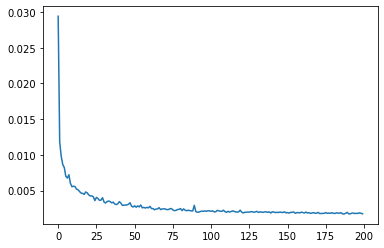

In [14]:
plt.plot(histogram.history['loss'])
plt.savefig('loss.png')
plt.show()

In [15]:
np.save('losses_200_epochs',hist.history['loss'])